# SMOTE (Synthetic Minority Oversampling Technique)

**SMOTE** is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

### Class Imbalance

- Often the distribution of the classes in datasets are skewed
- For a binary classification, we typically call the one class occuring more as the **Majority class** and the other as the **Minority class**. Example: Credit Card Fraud Detection
- The classifier ends up being dominated by the majority class
- The baseline methods are oversampling the minority class or undersampling the majority class

![image.png](attachment:image.png)

Some other techniques iclude:
- ADASYN
- BorderLine SMOTE
- KMeansSMOTE

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/SoumyadeepB/Machine-Learning/master/Datasets/credit_dataset.csv')

In [48]:
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


### Exploring the data distribution

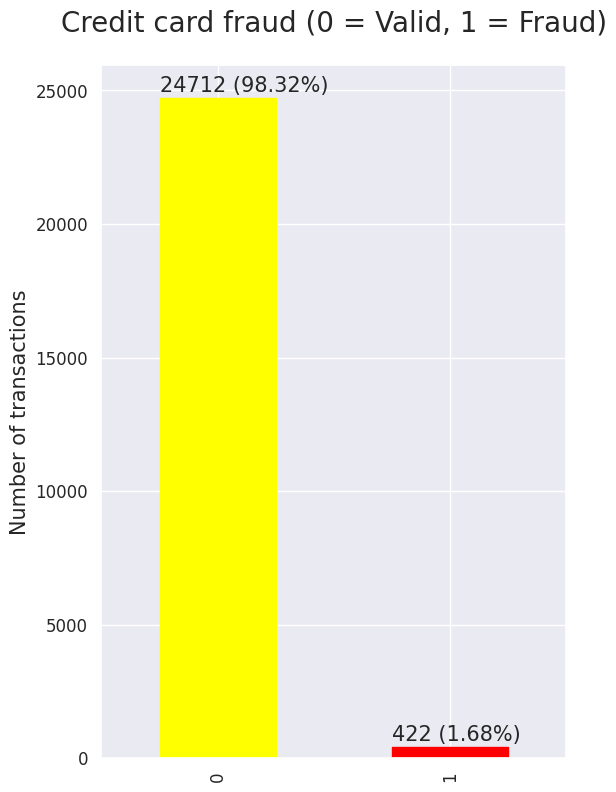

In [49]:
ax = df['TARGET'].value_counts().plot(kind='bar', figsize=(6, 9), fontsize=12)
ax.set_title('Credit card fraud (0 = Valid, 1 = Fraud)', size=20, pad=24)
ax.set_ylabel('Number of transactions', fontsize=15)

N = len(df)
colors= ['yellow','red']
idx = 0
for i in ax.patches:
    ax.text(i.get_x(), i.get_height() + 240, f"{str(round(i.get_height(), 2))} ({round(i.get_height()*100/N, 2)}%)", fontsize=15)
    i.set_color(colors[idx])
    idx+=1

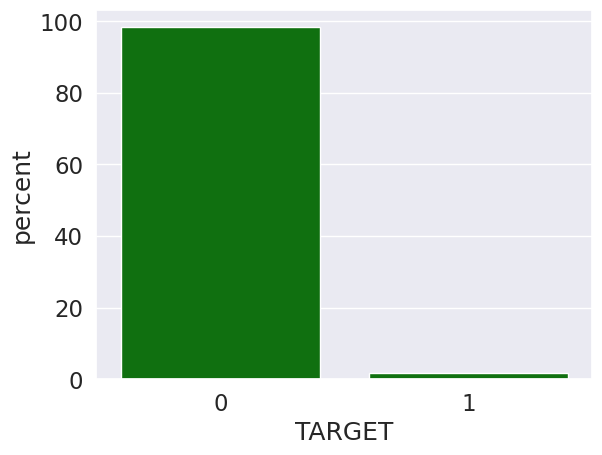

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df, x="TARGET",stat="percent", color='green')
plt.show()

## Data Preparation


In [51]:
df['GENDER'] = [0 if x == 'M' else 1 for x in df['GENDER']]
df['CAR'] = [1 if x == 'Y' else 0 for x in df['CAR']]
df['REALITY'] = [1 if x == 'Y' else 0 for x in df['REALITY']]

# Create dummy variables
dummy_income_type = pd.get_dummies(df['INCOME_TYPE'], prefix='INC_TYPE', drop_first=True)
dummy_edu_type = pd.get_dummies(df['EDUCATION_TYPE'], prefix='EDU_TYPE', drop_first=True)
dummy_family_type = pd.get_dummies(df['FAMILY_TYPE'], prefix='FAM_TYPE', drop_first=True)
dummy_house_type = pd.get_dummies(df['HOUSE_TYPE'], prefix='HOUSE_TYPE', drop_first=True)

# Drop unnecessary columns
to_drop = ['Unnamed: 0', 'ID', 'FLAG_MOBIL', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'INCOME_TYPE', 'HOUSE_TYPE']
df.drop(to_drop, axis=1, inplace=True)

# Merge into a single data frame
merged = pd.concat([df, dummy_income_type, dummy_edu_type, dummy_family_type, dummy_house_type], axis=1)
merged.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,...,EDU_TYPE_Secondary / secondary special,FAM_TYPE_Married,FAM_TYPE_Separated,FAM_TYPE_Single / not married,FAM_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,0,1,1,0,112500.0,0,0,0,2.0,29,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,270000.0,0,1,1,1.0,4,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,270000.0,0,1,1,1.0,26,...,1,0,0,1,0,1,0,0,0,0
3,1,0,1,0,270000.0,0,1,1,1.0,26,...,1,0,0,1,0,1,0,0,0,0
4,1,0,1,0,270000.0,0,1,1,1.0,38,...,1,0,0,1,0,1,0,0,0,0


In [52]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = [col for col in df.columns if df[col].max() > 1]
to_scale

['NO_OF_CHILD',
 'INCOME',
 'FAMILY SIZE',
 'BEGIN_MONTH',
 'AGE',
 'YEARS_EMPLOYED']

In [53]:
mms = MinMaxScaler()
scaled = mms.fit_transform(merged[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)
scaled

,NO_OF_CHILD,INCOME,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED
0,0.0,0.055233,0.052632,0.483333,0.826087,0.069767
1,0.0,0.156977,0.000000,0.066667,0.673913,0.186047
2,0.0,0.156977,0.000000,0.433333,0.673913,0.186047
3,0.0,0.156977,0.000000,0.433333,0.673913,0.186047
4,0.0,0.156977,0.000000,0.633333,0.673913,0.186047
...,...,...,...,...,...,...
25129,0.0,0.186047,0.052632,0.183333,0.586957,0.162791
25130,0.0,0.084302,0.052632,0.383333,0.282609,0.093023
25131,0.0,0.084302,0.052632,0.533333,0.282609,0.093023
25132,0.0,0.165698,0.052632,0.150000,0.608696,0.046512


In [54]:
# Replace original columns with scaled ones
for col in scaled:
    print(col)
    merged[col] = scaled[col]

merged.head()

NO_OF_CHILD
INCOME
FAMILY SIZE
BEGIN_MONTH
AGE
YEARS_EMPLOYED


,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,...,EDU_TYPE_Secondary / secondary special,FAM_TYPE_Married,FAM_TYPE_Separated,FAM_TYPE_Single / not married,FAM_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,0,1,1,0.0,0.055233,0,0,0,0.052632,0.483333,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0.0,0.156977,0,1,1,0.000000,0.066667,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0.0,0.156977,0,1,1,0.000000,0.433333,...,1,0,0,1,0,1,0,0,0,0
3,1,0,1,0.0,0.156977,0,1,1,0.000000,0.433333,...,1,0,0,1,0,1,0,0,0,0
4,1,0,1,0.0,0.156977,0,1,1,0.000000,0.633333,...,1,0,0,1,0,1,0,0,0,0


In [55]:
#from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
#to_scale = [col for col in df.columns if df[col].max() > 1]
#mms = MinMaxScaler()
#scaled = mms.fit_transform(merged[to_scale])
#scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
#for col in scaled:
#    merged[col] = scaled[col]

#merged.head()

## Ignoring the data imbalance

In [56]:
from sklearn.model_selection import train_test_split

X = merged.drop('TARGET', axis=1)
y = merged['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 1.69
% Positive class in Test  = 1.65


Accuracy = 0.98
Recall = 0.09



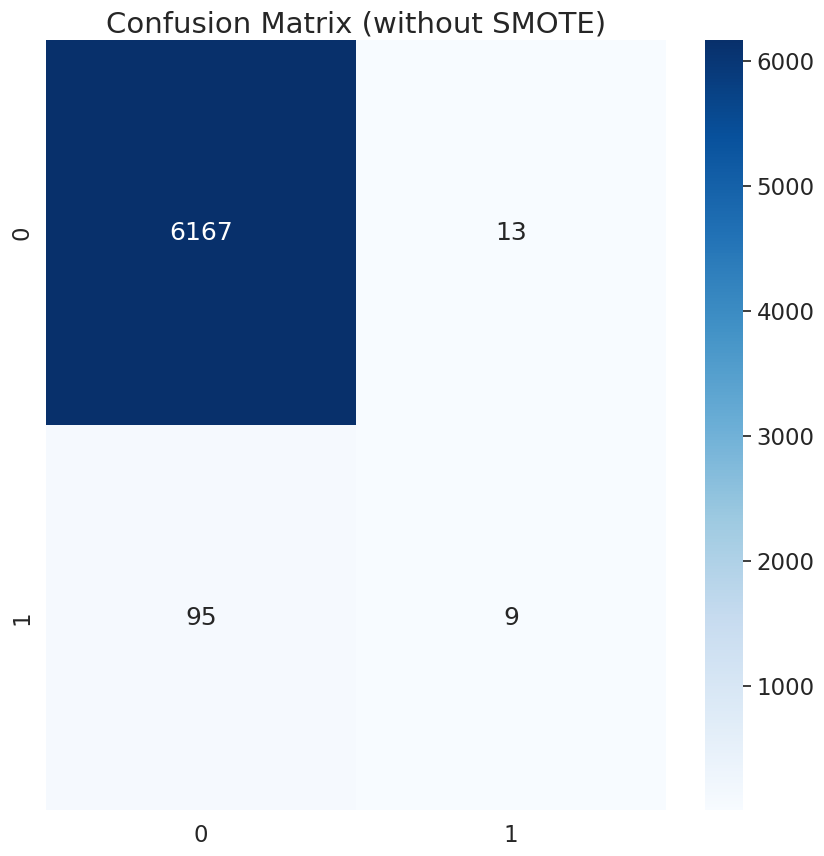

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = RandomForestClassifier(random_state=78)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(10, 10))
plt.title('Confusion Matrix (without SMOTE)', size=21)
sns.set(font_scale=1.5)

sns.heatmap(cm, annot=True, cmap='Blues', fmt="g");

[[   9   95]
 [  13 6167]]


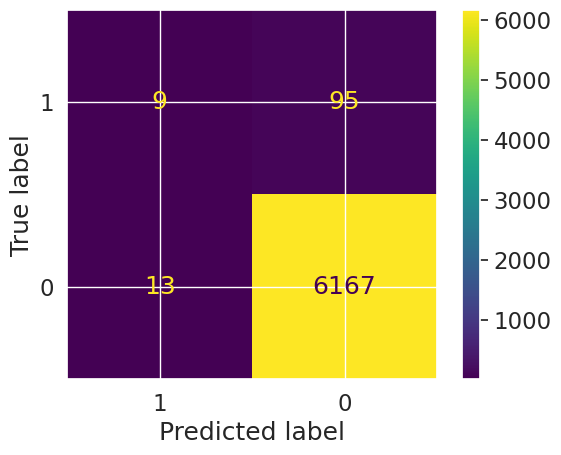

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test,preds,labels=[1,0]))
cm = confusion_matrix(y_test, preds, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,0])
disp.plot()
plt.show()


In [59]:
from sklearn.metrics import classification_report

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,preds,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,preds,labels=[1,0])
print('Classification report : \n',matrix)

Outcome values : 
 9 95 13 6167
Classification report : 
               precision    recall  f1-score   support

           1       0.41      0.09      0.14       104
           0       0.98      1.00      0.99      6180

    accuracy                           0.98      6284
   macro avg       0.70      0.54      0.57      6284
weighted avg       0.98      0.98      0.98      6284



## Adding SMOTE

In [60]:
# !pip install imbalanced-learn

In [61]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=78)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (25134, 29)
Shape of X after SMOTE: (49424, 29)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: TARGET, dtype: float64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
#cm = confusion_matrix(y_test, preds)
#plt.figure(figsize=(10, 9))
#plt.title('Confusion Matrix (with SMOTE)', size=15)
#sns.heatmap(cm, annot=True, cmap='Blues');

Accuracy = 0.99
Recall = 0.99



[[6147   81]
 [  58 6070]]


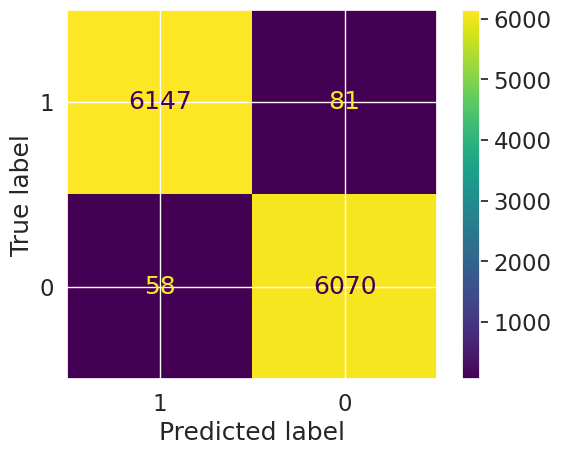

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test,preds,labels=[1,0]))
cm = confusion_matrix(y_test, preds, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,0])
disp.plot()
plt.show()

In [64]:
from sklearn.metrics import classification_report

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,preds,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,preds,labels=[1,0])
print('Classification report : \n',matrix)

Outcome values : 
 6147 81 58 6070
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99      6228
           0       0.99      0.99      0.99      6128

    accuracy                           0.99     12356
   macro avg       0.99      0.99      0.99     12356
weighted avg       0.99      0.99      0.99     12356



In [65]:
from imblearn.over_sampling import BorderlineSMOTE
# transform the dataset

sm = BorderlineSMOTE(random_state=78)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (25134, 29)
Shape of X after SMOTE: (49424, 29)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: TARGET, dtype: float64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')

Accuracy = 0.99
Recall = 0.99



[[6147   81]
 [  42 6086]]


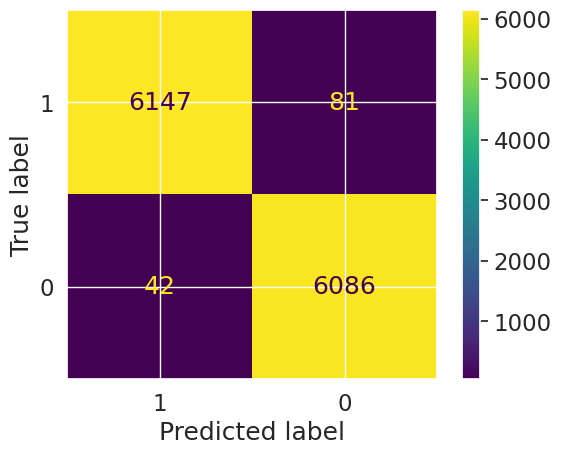

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test,preds,labels=[1,0]))
cm = confusion_matrix(y_test, preds, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,0])
disp.plot()
plt.show()

In [69]:
from sklearn.metrics import classification_report

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,preds,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,preds,labels=[1,0])
print('Classification report : \n',matrix)

Outcome values : 
 6147 81 42 6086
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99      6228
           0       0.99      0.99      0.99      6128

    accuracy                           0.99     12356
   macro avg       0.99      0.99      0.99     12356
weighted avg       0.99      0.99      0.99     12356



In [70]:
from imblearn.over_sampling import SVMSMOTE
# transform the dataset

sm = SVMSMOTE(random_state=78)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (25134, 29)
Shape of X after SMOTE: (38120, 29)

Balance of positive and negative classes (%):


0    64.826863
1    35.173137
Name: TARGET, dtype: float64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')

Accuracy = 0.99
Recall = 0.97



[[3270   87]
 [  34 6139]]


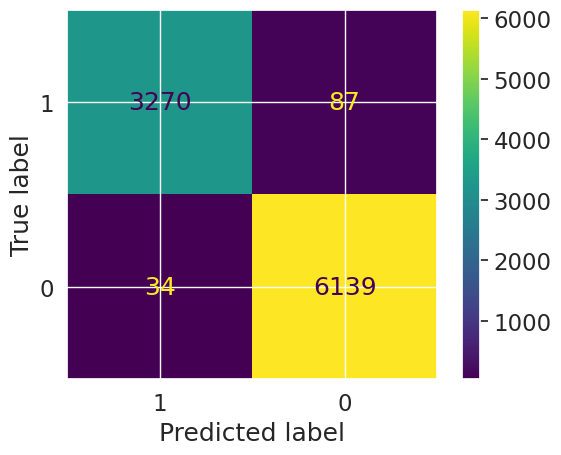

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test,preds,labels=[1,0]))
cm = confusion_matrix(y_test, preds, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,0])
disp.plot()
plt.show()

In [73]:
from sklearn.metrics import classification_report

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,preds,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,preds,labels=[1,0])
print('Classification report : \n',matrix)

Outcome values : 
 3270 87 34 6139
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.97      0.98      3357
           0       0.99      0.99      0.99      6173

    accuracy                           0.99      9530
   macro avg       0.99      0.98      0.99      9530
weighted avg       0.99      0.99      0.99      9530



In [74]:
from imblearn.over_sampling import ADASYN
# transform the dataset

sm = ADASYN(random_state=78)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (25134, 29)
Shape of X after SMOTE: (49522, 29)

Balance of positive and negative classes (%):


1    50.098946
0    49.901054
Name: TARGET, dtype: float64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')

Accuracy = 0.99
Recall = 0.99



[[6166   69]
 [  57 6089]]


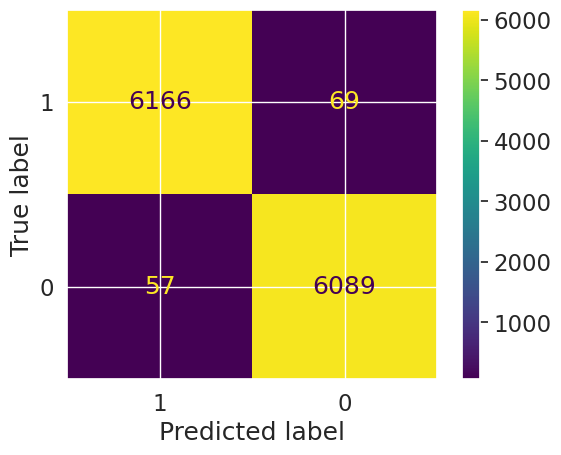

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test,preds,labels=[1,0]))
cm = confusion_matrix(y_test, preds, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,0])
disp.plot()
plt.show()

In [77]:
from sklearn.metrics import classification_report

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,preds,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,preds,labels=[1,0])
print('Classification report : \n',matrix)

Outcome values : 
 6166 69 57 6089
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99      6235
           0       0.99      0.99      0.99      6146

    accuracy                           0.99     12381
   macro avg       0.99      0.99      0.99     12381
weighted avg       0.99      0.99      0.99     12381



## Conclusion

**Without SMOTE**, the model correctly classified almost all genuine transactions. But it also classified 91% of fraud transactions as genuine. Hence, the model is unusable.
- Accuracy : 99%
- Recall: 9%

Applying **SMOTE** to features (X) and the target (y) resulted in new a feature and target set which is larger, due to the oversampling.
- Accuracy : 99%
- **Recall: 99%**

#**Accuracy**
###Accuracy is a fundamental metric in classification, providing a straightforward measure of how well a model performs its intended task.

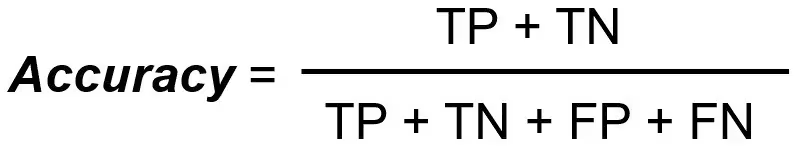


###Accuracy is often the first metric to consider when evaluating classification models. It's easy to understand and provides a quick snapshot of the model's performance. For instance, if a model has an accuracy of 90%, it makes correct predictions for 90 of every 100 instances. However, while accuracy is valuable, it's essential to understand when to use it. In scenarios where the **classes are relatively balanced, and the misclassification cost is the same for each class, accuracy can be a reliable metric.**

###**Limitations**
###Moreover, in real-world scenarios, the cost of different types of errors might vary. For instance, **a false negative (failing to identify a disease) might have more severe consequences** than **a false positive** in a medical diagnosis.

#**Precision**
###Precision is a pivotal metric in classification tasks, especially in scenarios with a high cost of false positives. It provides insights into the model's ability to **correctly predict positive instances while minimizing the risk of false alarms.**

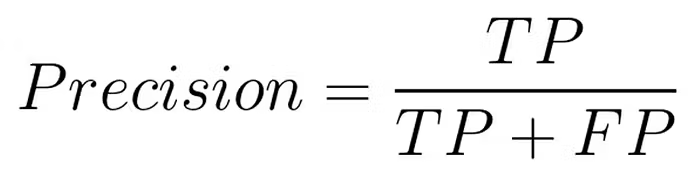

#Significance
###Precision is important when **false positives are costly.**

###In certain applications, the consequences of false positives can be severe, making precision an essential metric. For instance, in financial fraud detection, **falsely flagging a legitimate transaction as fraudulent (a false positive) can lead to unnecessary investigations, customer dissatisfaction, and potential loss of business.** Here, high precision ensures that most flagged transactions are indeed fraudulent, minimizing the number of false alarms.

#Limitations
###Precision focuses solely on the **correctly predicted positive cases, neglecting the false negatives.** As a result, a model can achieve high precision by making very few positive predictions, potentially missing out on many actual positive cases. **This narrow focus can be misleading, especially when false negatives have significant consequences.**

#**Recall**
###Recall is the **total number of the actual positive cases that were predicted correctly.** This metric is also known as sensitivity.

###Recall is a metric that measures **how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset.** You can calculate recall by dividing the number of true positives by the number of positive instances.

#Significance
###Recall is important in scenarios **where False Negatives are costly.**

###Example:

###Similarly, **a high recall ensures that most threats are identified and addressed in a security system designed to detect potential threats.** While this might **lead to some false alarms (false positives), the cost of missing a genuine threat (false negatives) could be catastrophic.**

##Both examples emphasize minimizing the risk of overlooking actual positive cases, even if it means accepting some false positives. This underscores the importance of recall in scenarios where the implications of false negatives are significant.

#Limitations
###The recall metric is about finding all positive cases, even with more false positives. A model may predict most instances as positive to achieve a high recall. This **leads to many incorrect positive predictions.** This can reduce the model's precision and result in unnecessary actions or interventions based on these false alarms.

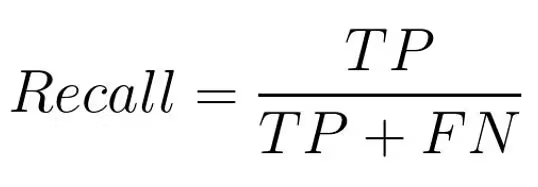

#**Precision VS Recall**
###**Precision** measures **how often predictions for the positive class are correct.** But **Recall** measures **how well the model finds all positive instances in the dataset.**

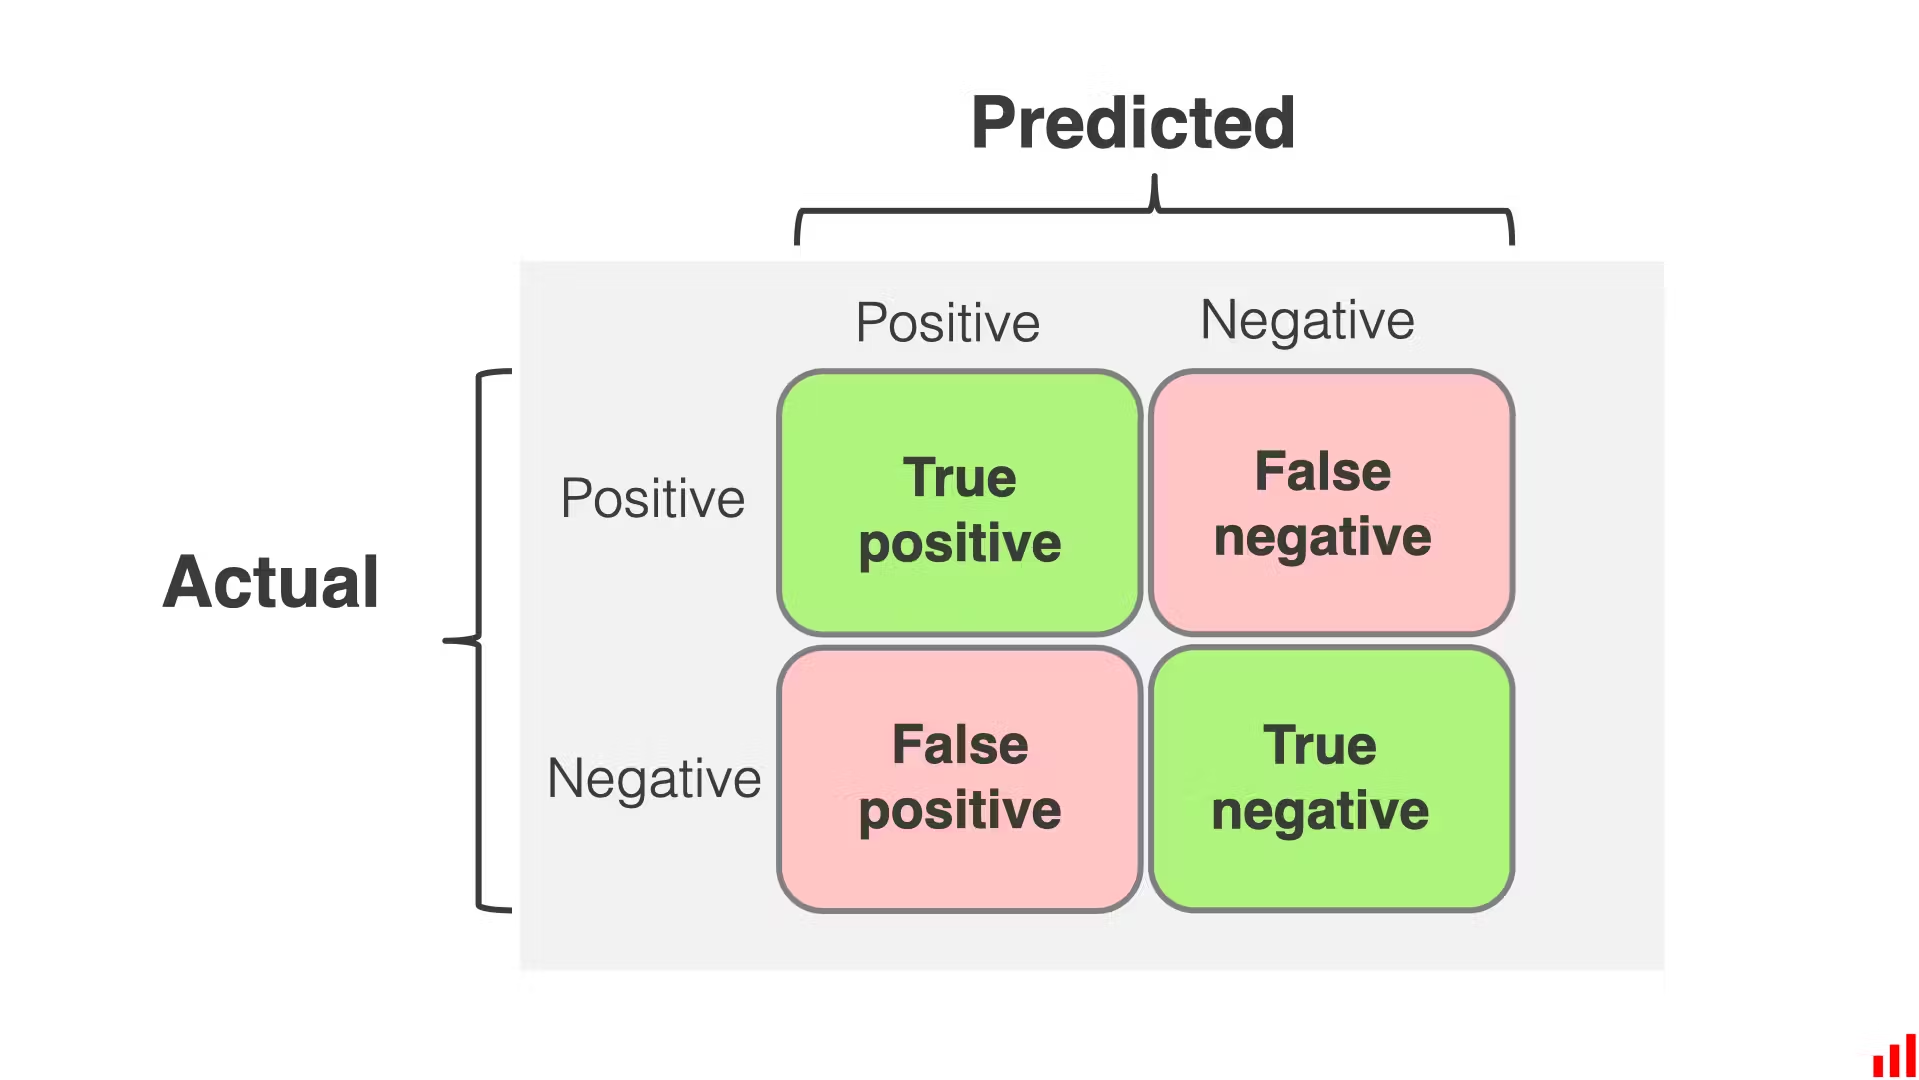

#**The Balancing Act: Precision and Recall**
###Precision and recall, two commonly used metrics in classification, often present a trade-off that requires careful consideration based on the specific application and its requirements.

#The Trade-off Between Precision and Recall
###There's an inherent trade-off between precision and recall. **Improving precision often comes at the expense of recall and vice versa.**

###For instance, a model that **predicts only the most certain positive cases will have high precision but may miss out on many actual positive cases, leading to low recall.**

###This balance is crucial in fraud detection, where **missing a fraudulent transaction (low recall) is as critical as incorrectly flagging a legitimate one (low precision).**

#**he Significance of the Precision-Recall Curve**

The precision-recall curve is a graphical representation that showcases the relationship between precision and recalls for different threshold settings. It helps visualize the trade-off and select an optimal threshold that balances both metrics.

###It is especially valuable for imbalanced datasets where one class is significantly underrepresented compared to others. In these scenarios, traditional metrics like accuracy can be misleading, as they might reflect the predominance of the majority class rather than the model's ability to identify the minority class correctly.

###The precision-recall curve measures **how well the minority class is predicted.** The measurement checks **how accurately we make positive predictions and detect actual positives.** The curve is an important tool for **assessing model performance in imbalanced datasets.** It helps choose an **optimal threshold that balances precision and recall effectively.**

####The closer this curve approaches the top-right corner of the graph, the more capable the model is at achieving high precision and recall simultaneously, indicating a robust performance in distinguishing between classes, regardless of their frequency in the dataset.

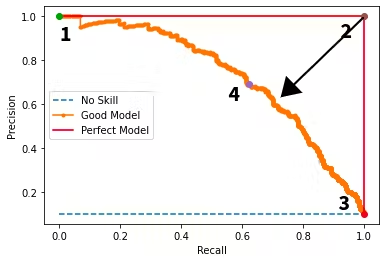

#*8mportance of Setting the Right Threshold for Classification**
###Adjusting the classification threshold directly impacts the shape and position of the precision-recall curve. **A lower threshold typically increases recall but reduces precision,** shifting the curve towards higher recall values. Conversely, **a higher threshold improves precision at the expense of recall,** moving the curve towards higher precision values.

###The precision-recall curve shows how changing thresholds affect precision and recall balance. This helps us **choose the best threshold for the application's specific needs.**

#**Scenarios Where Precision is More Important Than Recall**
###Precision becomes paramount when the cost of false positives is high. For instance, consider an email marketing campaign. If a company has many email addresses and pays a high cost for each email, it is important to ensure that the recipients are likely to respond. High precision ensures that most emails are sent to potential customers, minimizing wasted resources on those unlikely to engage.

#**Scenarios Where Recall is More Important Than Precision**
###Recall takes precedence when the cost of missing a positive instance (false negatives) is substantial. A classic example is in healthcare, specifically in administering flu shots. If you don't give a flu shot to someone who needs it, it could have serious health consequences. Also, giving a flu shot to someone who doesn't need it has a small cost. In such a scenario, healthcare providers might offer the flu shot to a broader audience, prioritizing recall over precision.

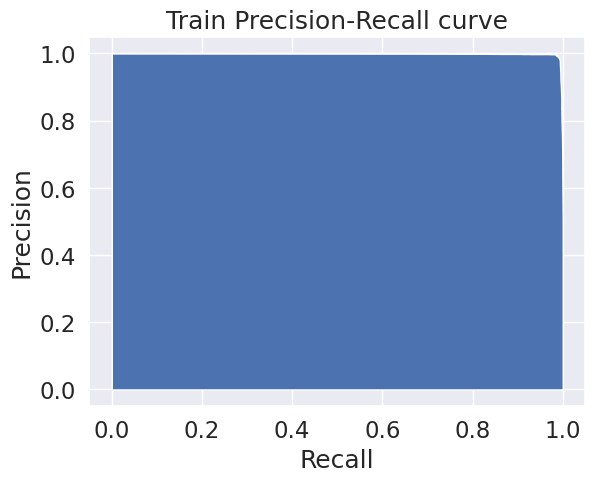

In [68]:
from sklearn.metrics import precision_recall_curve
# predict probabilities
y_prob_test = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_prob_test = y_prob_test[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_test)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");